In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [3]:
truth = pd.read_csv('./GHIL/labels.csv',header=None)
truth.columns = ['truth']

pre_ghil = pd.read_csv('./GHIL/pres.csv',header=None)
pre_ghil.columns = ['ghil']
ghil = truth.copy()
ghil['pre'] = pre_ghil['ghil']

pre_cnn = pd.read_csv('./CNN/cnn_pres.csv', index_col=0)
pre_cnn.columns = ['cnn']
cnn = truth.copy()
cnn['pre'] = pre_cnn['cnn']

pre_rf = pd.read_csv('./RF/RF_pres.csv', index_col=0)
pre_rf.columns = ['rf']
rf = truth.copy()
rf['pre'] = pre_rf['rf']


/tmp/ipykernel_2749668/2180283236.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


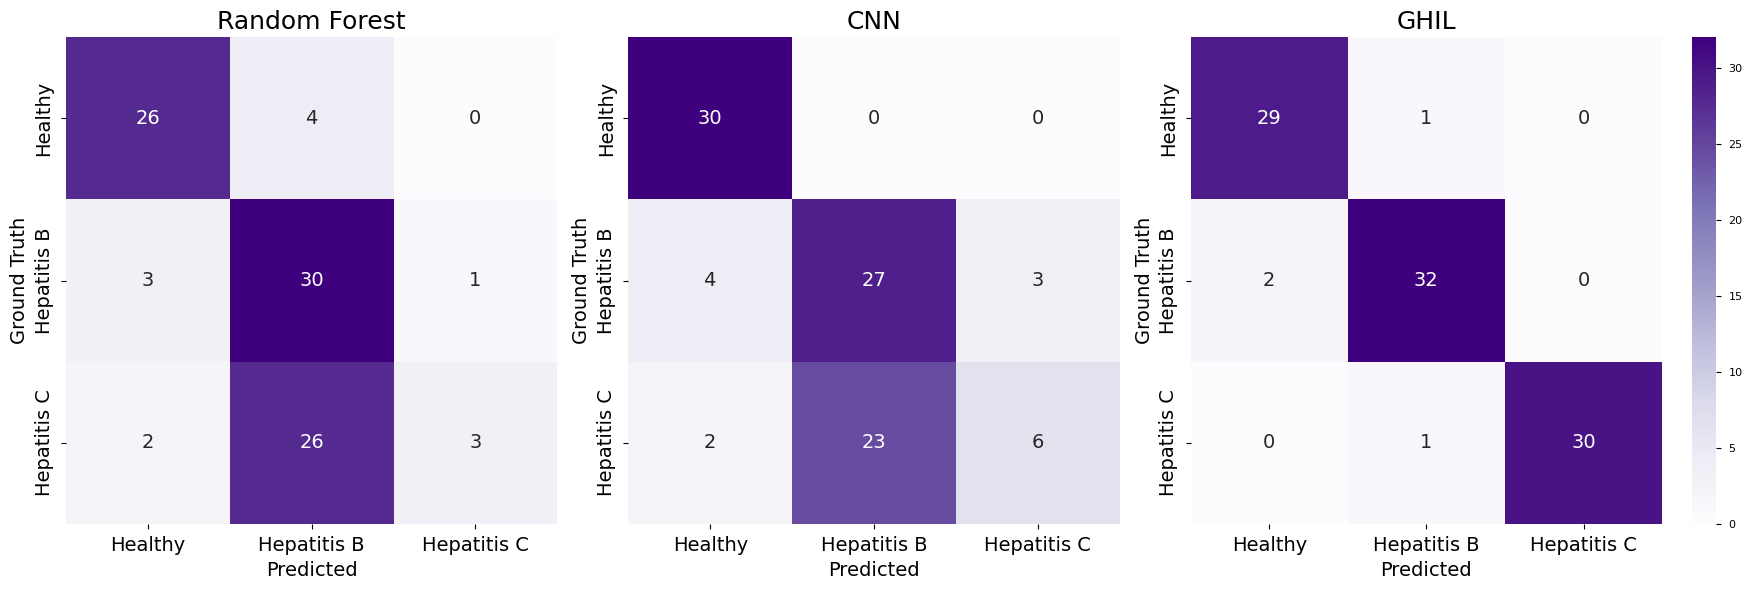

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 假设 labels 是你的类别标签
labels = ['Healthy', 'Hepatitis B', 'Hepatitis C']
# plt.style.use('bmh')
plt.style.use('seaborn-paper')

# 创建一个函数来绘制混淆矩阵
def plot_confusion_matrix(df, ax, title, cbar=True):
    conf_matrix = confusion_matrix(df['truth'], df['pre'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels, ax=ax,
                 annot_kws={"size": 14})  # 调整数字的字体大小为12
    ax.set_xlabel('Predicted', fontsize=14)  # 调整横坐标标签字体大小为14
    ax.set_ylabel('Ground Truth', fontsize=14)  # 调整纵坐标标签字体大小为14
    ax.set_title(title, fontsize=18)  # 调整标题字体大小为16
    ax.tick_params(axis='both', which='major', labelsize=14)  # 调整坐标轴刻度字体大小为12

    if not cbar:
        # 移除颜色条
        if ax.collections:
            for collection in ax.collections:
                if isinstance(collection, plt.cm.ScalarMappable):
                    collection.colorbar.remove()

# 创建一个包含三个子图的图像，调整最后一个子图的宽度
fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1, 1.2]})

# 对每个数据框调用 plot_confusion_matrix 函数绘制混淆矩阵
plot_confusion_matrix(rf, axes[0], 'Random Forest', cbar=False)
plot_confusion_matrix(cnn, axes[1], 'CNN', cbar=False)
plot_confusion_matrix(ghil, axes[2], 'GHIL', cbar=True)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


### augmented

In [5]:
pre_a_cnn = pd.read_csv('./A_CNN/cnn_pres.csv', index_col=0)
pre_a_cnn.columns = ['a_cnn']
a_cnn = truth.copy()
a_cnn['pre'] = pre_a_cnn['a_cnn']

pre_a_rf = pd.read_csv('./A_RF/A_RF_pres.csv', index_col=0)
pre_a_rf.columns = ['a_rf']
a_rf = truth.copy()
a_rf['pre'] = pre_a_rf['a_rf']

/tmp/ipykernel_2749668/4145207205.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


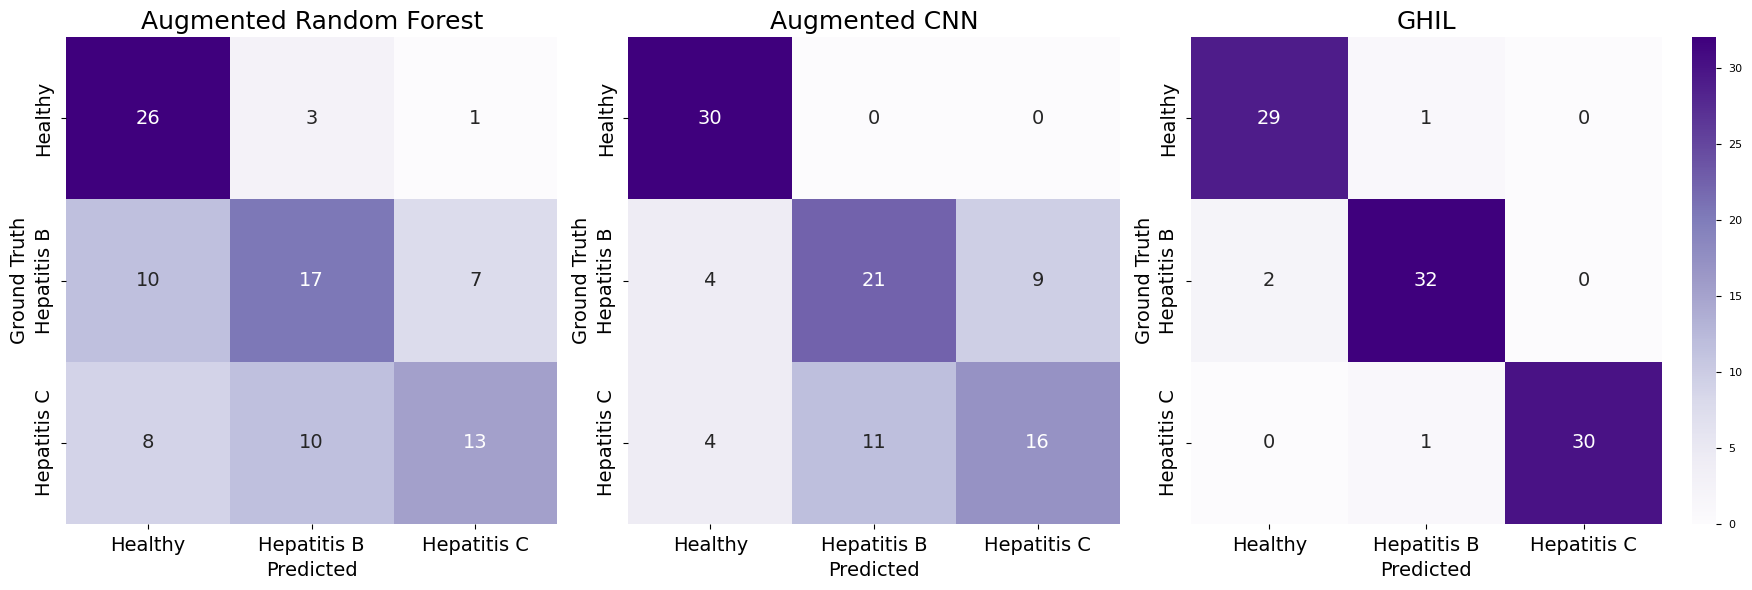

In [6]:
# 假设 labels 是你的类别标签
labels = ['Healthy', 'Hepatitis B', 'Hepatitis C']
# plt.style.use('bmh')
plt.style.use('seaborn-paper')

# 创建一个包含三个子图的图像，调整最后一个子图的宽度
fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1, 1.2]})

# 对每个数据框调用 plot_confusion_matrix 函数绘制混淆矩阵
plot_confusion_matrix(a_rf, axes[0], 'Augmented Random Forest', cbar=False)
plot_confusion_matrix(a_cnn, axes[1], 'Augmented CNN', cbar=False)
plot_confusion_matrix(ghil, axes[2], 'GHIL', cbar=True)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()
